#  1. Initial Settings

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Reading the CSV file

In [42]:
df = pd.read_csv("ai_job_dataset.csv")

# 3. Removing Empty Value

In [43]:
df_cleaned = df.dropna()

# 4. Unpivoting Data

In [44]:
df_longer = df_cleaned.melt(
    id_vars="company_location",
    value_vars="job_title",
    var_name="jobs"
)

# 5. Pivoting Data

In [45]:
df_pivot = df_longer.pivot_table(
    index="company_location",
    columns="jobs",
    aggfunc='count'
).sort_values(by=('value', 'job_title'), ascending=True)

# 6. Settings For Plotting A Horizontal Bar

In [46]:
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)
bar_height = 0.8
colors = plt.cm.Dark2.colors

# 7. Plotting A Horizontal Bar

C:\Users\lazar\AppData\Local\Temp\ipykernel_1468\267611083.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


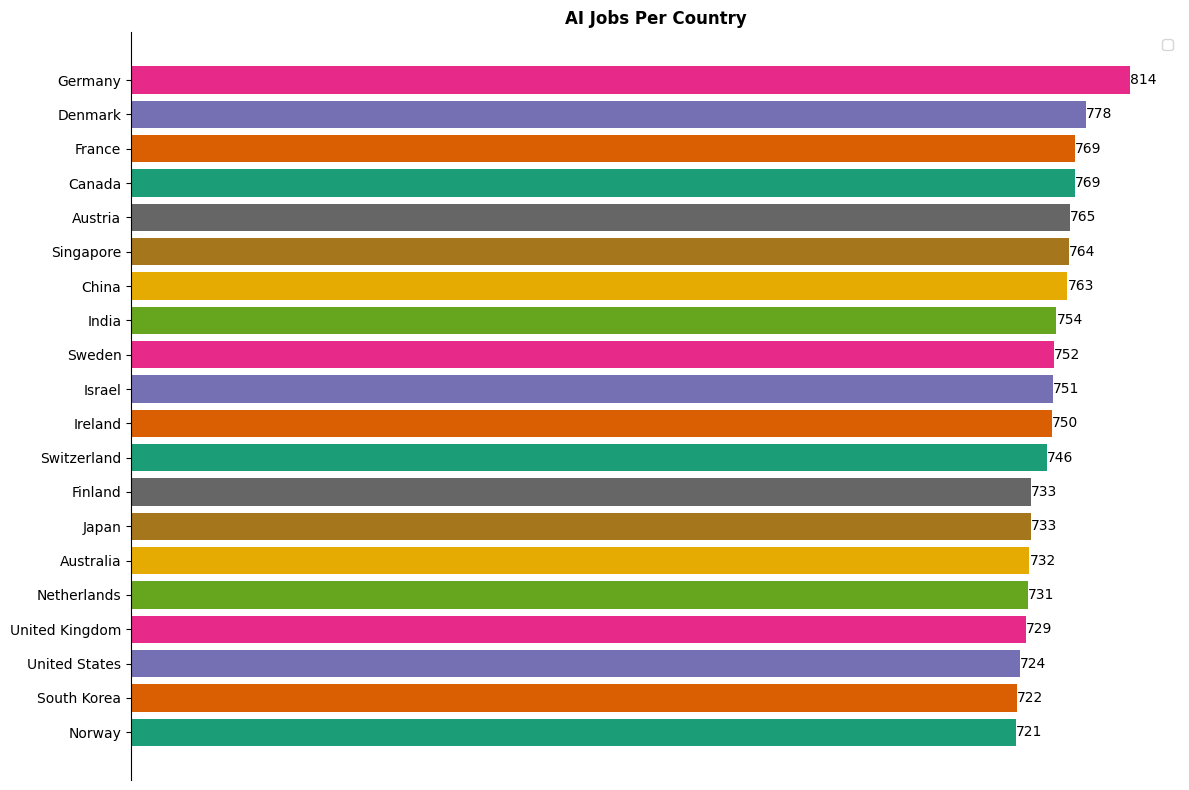

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(y_pos, df_pivot['value']['job_title'], bar_height, color=colors)

ax.bar_label(bars)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_yticks(y_pos)
ax.set_yticklabels(df_pivot.index)
ax.set_title("AI Jobs Per Country", fontweight="bold")

plt.tight_layout()
plt.show()